# 读取prometheus时间序列数据

## 准备

In [1]:
%%time
%%capture

!pip install prometheus-api-client

CPU times: user 8.42 ms, sys: 10.5 ms, total: 18.9 ms
Wall time: 3.32 s


## 得到所有指标

In [18]:
%%time

from prometheus_api_client import PrometheusConnect
prom = PrometheusConnect(url ="http://192.168.0.81:9090", disable_ssl=True)

# Get the list of all the metrics that the Prometheus host scrapes
prom.all_metrics()

CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 3.55 ms


['dhtexp_humidity',
 'dhtexp_temperature',
 'go_gc_cycles_automatic_gc_cycles_total',
 'go_gc_cycles_forced_gc_cycles_total',
 'go_gc_cycles_total_gc_cycles_total',
 'go_gc_duration_seconds',
 'go_gc_duration_seconds_count',
 'go_gc_duration_seconds_sum',
 'go_gc_gogc_percent',
 'go_gc_gomemlimit_bytes',
 'go_gc_heap_allocs_by_size_bytes_bucket',
 'go_gc_heap_allocs_by_size_bytes_count',
 'go_gc_heap_allocs_by_size_bytes_sum',
 'go_gc_heap_allocs_bytes_total',
 'go_gc_heap_allocs_objects_total',
 'go_gc_heap_frees_by_size_bytes_bucket',
 'go_gc_heap_frees_by_size_bytes_count',
 'go_gc_heap_frees_by_size_bytes_sum',
 'go_gc_heap_frees_bytes_total',
 'go_gc_heap_frees_objects_total',
 'go_gc_heap_goal_bytes',
 'go_gc_heap_live_bytes',
 'go_gc_heap_objects_objects',
 'go_gc_heap_tiny_allocs_objects_total',
 'go_gc_limiter_last_enabled_gc_cycle',
 'go_gc_pauses_seconds_bucket',
 'go_gc_pauses_seconds_count',
 'go_gc_pauses_seconds_sum',
 'go_gc_scan_globals_bytes',
 'go_gc_scan_heap_bytes'

## 获取当前指定指标的值

### 指定指标名称

In [26]:
%%time

data=prom.custom_query(query="dhtexp_temperature")
data

CPU times: user 2.29 ms, sys: 0 ns, total: 2.29 ms
Wall time: 2.42 ms


[{'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'value': [1720693392.929, '26.1']},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-home-proxy:8888',
   'job': 'sensors'},
  'value': [1720693392.929, '28.3']}]

In [9]:
float(data[0]['value'][1])

25.6

In [10]:
%%time

prom.custom_query(query="dhtexp_humidity")

CPU times: user 2.32 ms, sys: 123 µs, total: 2.45 ms
Wall time: 2.65 ms


[{'metric': {'__name__': 'dhtexp_humidity',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'value': [1720428171.983, '51.4']}]

### 指定指标和条件

In [43]:
%%time

my_label_config = {'instance': 'sensor-office:8663'}
data=prom.get_current_metric_value(metric_name='dhtexp_temperature', label_config=my_label_config)

data[0]['value'][1]

CPU times: user 1.92 ms, sys: 488 µs, total: 2.4 ms
Wall time: 2.44 ms


'26.4'

## 获取时间范围内的指标值序列

In [25]:
%%time

from prometheus_api_client.utils import parse_datetime
from datetime import timedelta

start_time = parse_datetime("60s")
end_time = parse_datetime("now")
chunk_size = timedelta(seconds=20)

metric_data = prom.get_metric_range_data(
    "dhtexp_temperature",  
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

metric_data

CPU times: user 6.46 ms, sys: 0 ns, total: 6.46 ms
Wall time: 9.02 ms


[{'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-home-proxy:8888',
   'job': 'sensors'},
  'values': [[1720693176.91, '28.3']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'values': [[1720693174.713, '26']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-home-proxy:8888',
   'job': 'sensors'},
  'values': [[1720693191.91, '28.3']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'values': [[1720693189.715, '26']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-home-proxy:8888',
   'job': 'sensors'},
  'values': [[1720693206.91, '28.3']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'values': [[1720693204.715, '26'], [1720693219.713, '26']]}]

## 自定义条件查询

### 基于api

In [12]:
%%time

my_label_config = {'instance': 'sensor-office:8663'}
metric_data = prom.get_metric_range_data(
    metric_name='dhtexp_temperature', 
    label_config=my_label_config,
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

metric_data

CPU times: user 3.53 ms, sys: 900 µs, total: 4.43 ms
Wall time: 4.62 ms


[{'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'values': [[1720427584.714, '25.6'],
   [1720427599.714, '25.6'],
   [1720427614.714, '25.6'],
   [1720427629.714, '25.6'],
   [1720427644.716, '25.6'],
   [1720427659.717, '25.6'],
   [1720427674.714, '25.6'],
   [1720427689.717, '25.6'],
   [1720427704.718, '25.7'],
   [1720427719.718, '25.6'],
   [1720427734.714, '25.6'],
   [1720427749.717, '25.6'],
   [1720427764.714, '25.6'],
   [1720427779.718, '25.6'],
   [1720427794.718, '25.6'],
   [1720427809.717, '25.6'],
   [1720427824.714, '25.6'],
   [1720427839.717, '25.6'],
   [1720427854.717, '25.6'],
   [1720427869.717, '25.6']]},
 {'metric': {'__name__': 'dhtexp_temperature',
   'instance': 'sensor-office:8663',
   'job': 'sensors'},
  'values': [[1720427884.714, '25.6'],
   [1720427899.718, '25.6'],
   [1720427914.718, '25.6'],
   [1720427929.717, '25.6'],
   [1720427944.714, '25.7'],
   [1720427959.718, '25.7'],
   [17204279

In [13]:
%%time

from prometheus_api_client import PrometheusConnect, MetricsList, Metric

metric_object_list = MetricsList(metric_data)

# We can see what each of the metric objects look like
for item in metric_object_list:
    print(item.metric_name, item.label_config, "\n")

dhtexp_temperature {'instance': 'sensor-office:8663', 'job': 'sensors'} 

CPU times: user 5.43 ms, sys: 0 ns, total: 5.43 ms
Wall time: 5.33 ms


In [14]:
my_metric_object = metric_object_list[0] # one of the metrics from the list
print(my_metric_object)

{
metric_name: 'dhtexp_temperature'
label_config: {'instance': 'sensor-office:8663', 'job': 'sensors'}
metric_values:                               ds     y
0  2024-07-08 08:33:04.713999987  25.6
1  2024-07-08 08:33:19.713999987  25.6
2  2024-07-08 08:33:34.713999987  25.6
3  2024-07-08 08:33:49.713999987  25.6
4  2024-07-08 08:34:04.716000080  25.6
5  2024-07-08 08:34:19.717000008  25.6
6  2024-07-08 08:34:34.713999987  25.6
7  2024-07-08 08:34:49.717000008  25.6
8  2024-07-08 08:35:04.717999935  25.7
9  2024-07-08 08:35:19.717999935  25.6
10 2024-07-08 08:35:34.713999987  25.6
11 2024-07-08 08:35:49.717000008  25.6
12 2024-07-08 08:36:04.713999987  25.6
13 2024-07-08 08:36:19.717999935  25.6
14 2024-07-08 08:36:34.717999935  25.6
15 2024-07-08 08:36:49.717000008  25.6
16 2024-07-08 08:37:04.713999987  25.6
17 2024-07-08 08:37:19.717000008  25.6
18 2024-07-08 08:37:34.717000008  25.6
19 2024-07-08 08:37:49.717000008  25.6
20 2024-07-08 08:38:04.713999987  25.6
21 2024-07-08 08:38:19.7

### 基于promQL

#### 得到数据指标

In [63]:
%%time

data=prom.custom_query(query="avg_over_time(dhtexp_temperature{instance=\"sensor-home-proxy:8888\"}[1h])[24h:1h]")
data

CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 3.7 ms


[{'metric': {'instance': 'sensor-home-proxy:8888', 'job': 'sensors'},
  'values': [[1720681200, '28.229166666666654'],
   [1720684800, '28.181249999999988'],
   [1720688400, '28.177916666666654'],
   [1720692000, '28.34625'],
   [1720695600, '28.275833333333342'],
   [1720699200, '28.1575'],
   [1720702800, '28.211250000000007'],
   [1720706400, '28.17333333333333'],
   [1720710000, '28.06083333333333'],
   [1720713600, '28.108750000000004'],
   [1720717200, '28.032500000000006'],
   [1720720800, '27.991666666666685'],
   [1720724400, '27.949999999999992'],
   [1720728000, '27.87083333333333'],
   [1720731600, '28.13833333333334'],
   [1720735200, '28.15958333333333'],
   [1720738800, '28.113333333333326'],
   [1720742400, '28.292050209205023'],
   [1720746000, '28.506249999999998'],
   [1720749600, '28.52583333333333'],
   [1720753200, '27.908333333333346'],
   [1720756800, '27.55291666666667'],
   [1720760400, '27.46541666666667'],
   [1720764000, '27.40041666666666']]}]

#### 转换为表格和折线图

In [64]:
# data[0]['values']

# 将第二个元素的字符串转为浮点数，并保留小数点后3位
data = [[timestamp, round(float(temp), 3)] for timestamp, temp in data[0]['values']]
data

[[1720681200, 28.229],
 [1720684800, 28.181],
 [1720688400, 28.178],
 [1720692000, 28.346],
 [1720695600, 28.276],
 [1720699200, 28.157],
 [1720702800, 28.211],
 [1720706400, 28.173],
 [1720710000, 28.061],
 [1720713600, 28.109],
 [1720717200, 28.033],
 [1720720800, 27.992],
 [1720724400, 27.95],
 [1720728000, 27.871],
 [1720731600, 28.138],
 [1720735200, 28.16],
 [1720738800, 28.113],
 [1720742400, 28.292],
 [1720746000, 28.506],
 [1720749600, 28.526],
 [1720753200, 27.908],
 [1720756800, 27.553],
 [1720760400, 27.465],
 [1720764000, 27.4]]

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from datetime import datetime

records=data

df = pd.DataFrame(records, columns=['Timestamp', 'Temperature'])
# 将 Timestamp 列转换为日期时间格式（可选）
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# 将 Timestamp 列本地化为 UTC
df['Timestamp'] = df['Timestamp'].dt.tz_localize('UTC')

# 将时间转换为当前系统时区
local_tz = datetime.now().astimezone().tzinfo
df['Timestamp'] = df['Timestamp'].dt.tz_convert(local_tz)

df

,Timestamp,Temperature
0,2024-07-11 15:00:00+08:00,28.229
1,2024-07-11 16:00:00+08:00,28.181
2,2024-07-11 17:00:00+08:00,28.178
3,2024-07-11 18:00:00+08:00,28.346
4,2024-07-11 19:00:00+08:00,28.276
5,2024-07-11 20:00:00+08:00,28.157
6,2024-07-11 21:00:00+08:00,28.211
7,2024-07-11 22:00:00+08:00,28.173
8,2024-07-11 23:00:00+08:00,28.061
9,2024-07-12 00:00:00+08:00,28.109


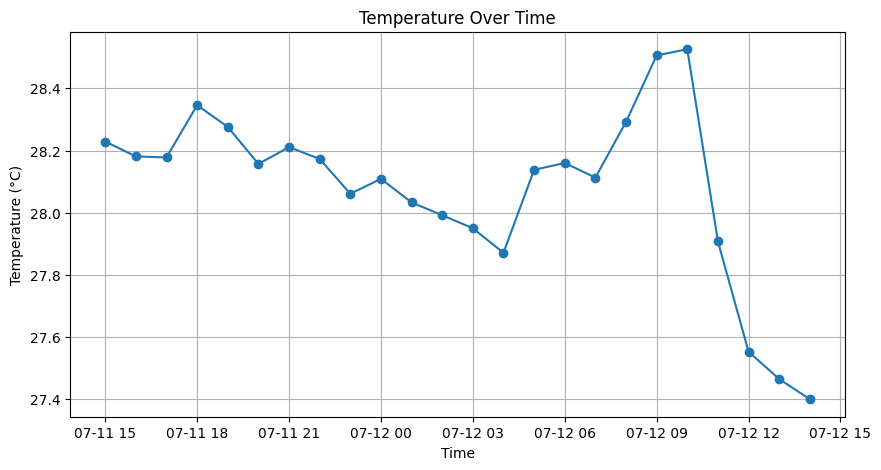

In [68]:
import matplotlib.pyplot as plt

# 绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Temperature'], marker='o')

# 设置图表标题和标签
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

## 绘制折线图

CPU times: user 251 ms, sys: 15.7 ms, total: 266 ms
Wall time: 266 ms


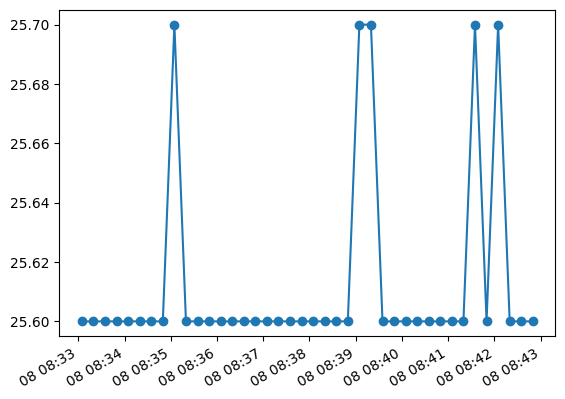

In [15]:
%%time

my_metric_object.plot()

## 结合 pandas 的使用

In [17]:
%%time

from prometheus_api_client import MetricSnapshotDataFrame, MetricRangeDataFrame

metric_df = MetricSnapshotDataFrame(metric_data)
metric_df.head()

CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.19 ms


,__name__,instance,job,timestamp,value
0,dhtexp_temperature,sensor-office:8663,sensors,2024-07-08 08:37:49.717000008,25.6
1,dhtexp_temperature,sensor-office:8663,sensors,2024-07-08 08:42:49.717000008,25.6
